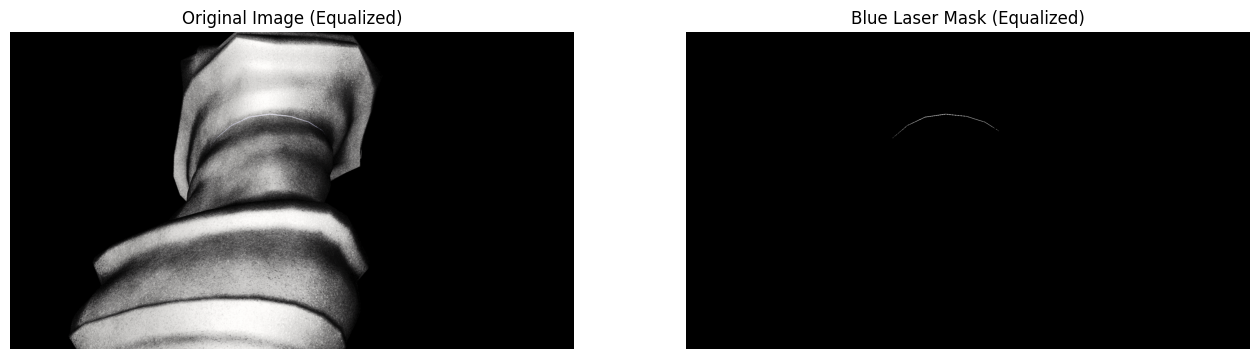

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Get a random PNG file from the directory
folder = "log_reconstruction/final_3d_scan/"
png_files = [f for f in os.listdir(folder) if f.lower().endswith('.png')]
random_file = random.choice(png_files)
img_path = os.path.join(folder, random_file)

# Load the image (OpenCV loads in BGR)
img = cv2.imread(img_path)

# Convert to HSV for better color segmentation
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define blue color range (tune as needed)
lower_blue = np.array([30, 30, 30])
upper_blue = np.array([140, 255, 255])

# Mask the blue regions
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# --- Normalize images for better brightness/contrast ---
# Normalize original image
img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
# Normalize mask for display
mask_norm = cv2.normalize(mask, None, 0, 255, cv2.NORM_MINMAX)

# --- Histogram Equalization ---
# For color images, convert to YUV and equalize the Y channel
img_yuv = cv2.cvtColor(img_norm, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# For mask (single channel), just equalize directly
mask_eq = cv2.equalizeHist(mask_norm)

# Plot original and mask (bigger and brighter, with equalization)
plt.figure(figsize=(16, 10))
plt.subplot(1,2,1)
plt.title('Original Image (Equalized)')
plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Blue Laser Mask (Equalized)')
plt.imshow(mask_eq, cmap='gray')
plt.axis('off')

plt.show()